Teste feito com as seguintes observações
- Colunas cabine, nome, ticket e embarked foram excluidas
- Idades faltantes preenchidas com a média aritimética
- Valores normalizados
- Acuracia: 80%
- K = 5

Importando as bibliotecas necessárias

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Lendo o arquivo de treino

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Tratando as idades faltantes
 - Aplicado a media das idades nos registros faltantes

In [4]:
df_train['Age'] = df_train['Age'].fillna(round(df_train['Age'].mean()))

In [5]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Removendo as colunas 'Name', 'Cabin', 'Ticket' e 'Embarked'

In [6]:
df_train = df_train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [7]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,30.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


Com a coluna de genero, iremos atribuir 0 para feminino e 1 para masculino 

In [8]:
df_train['Sex'] = df_train['Sex'].replace({'female': 0, 'male': 1})

C:\Users\maste\AppData\Local\Temp\ipykernel_16724\730276888.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex'] = df_train['Sex'].replace({'female': 0, 'male': 1})


In [9]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,30.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


Normalizando os dados

In [10]:
scaler = MinMaxScaler()
df_train_normalized = scaler.fit_transform(df_train)
df_train_normalized = pd.DataFrame(df_train_normalized, columns=df_train.columns)
df_train_normalized.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.000000,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151
1,0.001124,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136
2,0.002247,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469
3,0.003371,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644
4,0.004494,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713


In [11]:
df_train_normalized.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.647587,0.368672,0.065376,0.063599,0.062858
std,0.289162,0.486592,0.418036,0.477990,0.163390,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.015440
50%,0.500000,0.000000,1.000000,1.000000,0.371701,0.000000,0.000000,0.028213
75%,0.750000,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Agora iremos definir o X e o y, removendo a coluna 'Survived' que é o alvo

In [12]:
X = df_train_normalized.drop(['Survived',], axis=1)
y = df_train['Survived']

Assim fica o X, os dados que serão treinados

In [13]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.000000,1.0,1.0,0.271174,0.125,0.000000,0.014151
1,0.001124,0.0,0.0,0.472229,0.125,0.000000,0.139136
2,0.002247,1.0,0.0,0.321438,0.000,0.000000,0.015469
3,0.003371,0.0,0.0,0.434531,0.125,0.000000,0.103644
4,0.004494,1.0,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...
886,0.995506,0.5,1.0,0.334004,0.000,0.000000,0.025374
887,0.996629,0.0,0.0,0.233476,0.000,0.000000,0.058556
888,0.997753,1.0,0.0,0.371701,0.125,0.333333,0.045771
889,0.998876,0.0,1.0,0.321438,0.000,0.000000,0.058556


Assim fica o y, o alvo

In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Separamos os dados para treino, 80% para treino e 20% para validação

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Usamos a tecnica de cross validation para definir um ótimo valor para k

Melhor valor de k: 5
Melhor acurácia: 0.8103


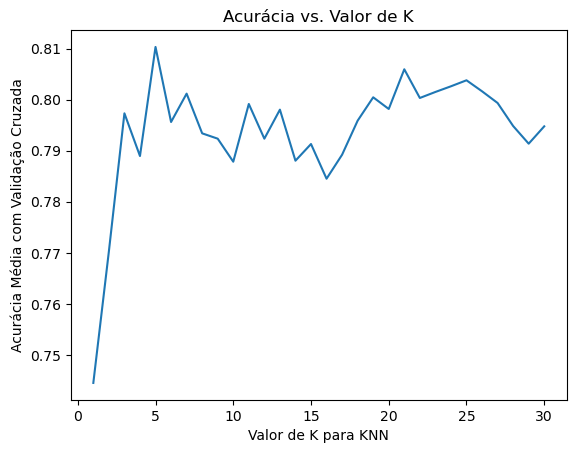

In [16]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=50, scoring='accuracy')
    k_scores.append(scores.mean())

melhor_k = k_range[k_scores.index(max(k_scores))]
melhor_score = max(k_scores)

print(f"Melhor valor de k: {melhor_k}")
print(f"Melhor acurácia: {melhor_score:.4f}")

plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acurácia Média com Validação Cruzada')
plt.title('Acurácia vs. Valor de K')
plt.show()

Definimos o modelo de classificação com o valor de k definido na etapa de cross validation

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

Treinamos o modelo

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Acuracia do modelo

In [19]:
print(knn.score(X_test, y_test))

0.8100558659217877


Predição do modelo

In [20]:
y_pred = knn.predict(X_test)

Matriz de confusão

Verdadeiros Positivos: 50
Verdadeiros Negativos: 95
Falsos Positivos: 10
Falsos Negativos: 24


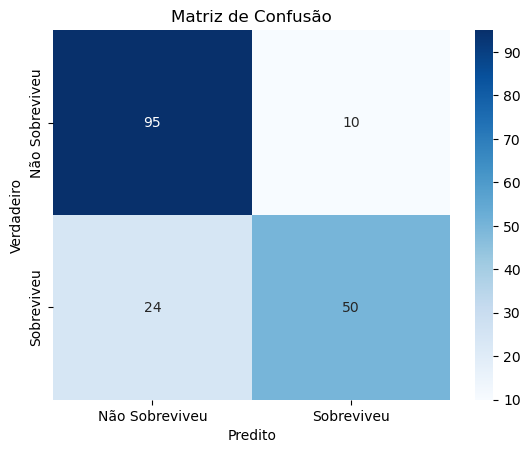

In [21]:
cm = confusion_matrix(y_test, y_pred)
VP = cm[1, 1]
VN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print(f'Verdadeiros Positivos: {VP}')
print(f'Verdadeiros Negativos: {VN}')
print(f'Falsos Positivos: {FP}')
print(f'Falsos Negativos: {FN}')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

Relatório de classificação

In [22]:
print(classification_report(y_test, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu']))

                precision    recall  f1-score   support

Não Sobreviveu       0.80      0.90      0.85       105
    Sobreviveu       0.83      0.68      0.75        74

      accuracy                           0.81       179
     macro avg       0.82      0.79      0.80       179
  weighted avg       0.81      0.81      0.81       179



Taxa de erro

In [23]:
taxa_erro = 1 - accuracy_score(y_test, y_pred)

In [24]:
taxa_erro

0.1899441340782123

Especificidade

In [25]:
especificidade = VN / (VN + FP)

In [26]:
especificidade

0.9047619047619048

Sensibilidade

In [27]:
sensibilidade = recall_score(y_test, y_pred)

In [28]:
sensibilidade

0.6756756756756757

Índice de Youden

In [29]:
indice_youden = sensibilidade + especificidade - 1

In [30]:
indice_youden

0.5804375804375805

Predição do modelo com arquivo de validação

In [31]:
df_validation = pd.read_csv('validation.csv')

In [32]:
df_validation

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Tratando as idades e fare faltantes
 - Aplicado a media de cada atributo nos registros faltantes

In [33]:
df_validation['Age'] = df_validation['Age'].fillna(round(df_validation['Age'].mean()))
df_validation['Fare'] = df_validation['Fare'].fillna(round(df_validation['Fare'].mean()))

In [34]:
df_validation

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S


Removendo as colunas 'Name', 'Cabin', 'Ticket' e 'Embarked'

In [35]:
df_validation = df_validation.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [36]:
df_validation

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,male,30.0,0,0,8.0500
414,1306,1,female,39.0,0,0,108.9000
415,1307,3,male,38.5,0,0,7.2500
416,1308,3,male,30.0,0,0,8.0500


Com a coluna de genero, iremos atribuir 0 para feminino e 1 para masculino 

In [37]:
df_validation['Sex'] = df_validation['Sex'].astype(str).replace({'female': 0, 'male': 1})

C:\Users\maste\AppData\Local\Temp\ipykernel_16724\2679396882.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_validation['Sex'] = df_validation['Sex'].astype(str).replace({'female': 0, 'male': 1})


In [38]:
df_validation

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,30.0,0,0,8.0500
414,1306,1,0,39.0,0,0,108.9000
415,1307,3,1,38.5,0,0,7.2500
416,1308,3,1,30.0,0,0,8.0500


Padronizando os dados

In [39]:
df_val_normalized = scaler.fit_transform(df_validation)
df_val_normalized = pd.DataFrame(df_val_normalized, columns=df_validation.columns)
df_val_normalized.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.000000,1.0,1.0,0.452723,0.000,0.000000,0.015282
1,0.002398,1.0,0.0,0.617566,0.125,0.000000,0.013663
2,0.004796,0.5,1.0,0.815377,0.000,0.000000,0.018909
3,0.007194,1.0,1.0,0.353818,0.000,0.000000,0.016908
4,0.009592,1.0,0.0,0.287881,0.125,0.111111,0.023984


In [40]:
df_val_normalized.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.500000,0.632775,0.636364,0.396235,0.055921,0.043594,0.069541
std,0.289713,0.420919,0.481622,0.166623,0.112095,0.109048,0.108993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.301068,0.000000,0.000000,0.015412
50%,0.500000,1.000000,1.000000,0.393380,0.000000,0.000000,0.028213
75%,0.750000,1.000000,1.000000,0.469207,0.125000,0.000000,0.061484
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Predição com os dados do arquivo de validação

In [41]:
validation_result = knn.predict(df_val_normalized)

In [42]:
validation_result

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [43]:
df_val_normalized

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.000000,1.0,1.0,0.452723,0.000,0.000000,0.015282
1,0.002398,1.0,0.0,0.617566,0.125,0.000000,0.013663
2,0.004796,0.5,1.0,0.815377,0.000,0.000000,0.018909
3,0.007194,1.0,1.0,0.353818,0.000,0.000000,0.016908
4,0.009592,1.0,0.0,0.287881,0.125,0.111111,0.023984
...,...,...,...,...,...,...,...
413,0.990408,1.0,1.0,0.393380,0.000,0.000000,0.015713
414,0.992806,0.0,0.0,0.512066,0.000,0.000000,0.212559
415,0.995204,1.0,1.0,0.505473,0.000,0.000000,0.014151
416,0.997602,1.0,1.0,0.393380,0.000,0.000000,0.015713


Revertendo a normalização para gerar o arquivo de resultado

In [44]:
original_data = scaler.inverse_transform(df_val_normalized)
original_data = pd.DataFrame(original_data, columns=df_validation.columns)
original_data['Survived'] = validation_result
int_columns = ['PassengerId']
for column in int_columns:
    original_data[column] = original_data[column].round().astype(int)

In [45]:
original_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,892,3.0,1.0,34.5,0.0,0.0,7.8292,0
1,893,3.0,0.0,47.0,1.0,0.0,7.0000,0
2,894,2.0,1.0,62.0,0.0,0.0,9.6875,0
3,895,3.0,1.0,27.0,0.0,0.0,8.6625,0
4,896,3.0,0.0,22.0,1.0,1.0,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3.0,1.0,30.0,0.0,0.0,8.0500,0
414,1306,1.0,0.0,39.0,0.0,0.0,108.9000,1
415,1307,3.0,1.0,38.5,0.0,0.0,7.2500,0
416,1308,3.0,1.0,30.0,0.0,0.0,8.0500,0


Gerando arquivo de resultado com 'PassengerId' e 'Survived'

In [46]:

df_result = original_data[['PassengerId', 'Survived']]
df_result.to_csv('result.csv', index=False)

In [47]:
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
